This file holds the results from the bxa fitting process.  It holds the best fit parameters based on the Multinest algorithm use of the Maximum Likelihood.  Holds best fit parameters, errors, and statistics.

For the 'PARAM' lists, the values are as in the following order:
    - best-fit parameter
    - 1-sigma lower
    - 1-sigma upper
    - 2-sigma lower
    - 2-sigma upper
    - 3-sigma lower
    - 3-sigma upper

In [1]:
from __future__ import division
import os
import numpy 
import pandas as pd
from collections import OrderedDict
from astropy.io import fits as pyfits
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def check_exists(filename):
    if os.path.exists(filename):
        pass
    else:
        raise Exception, "File does not exist."    

In [3]:
modName      = 'grbm+blackb+lpow'
version      = '-01-'
det          = 'G'
burst        = 'bn080916009'



# *_*_*_*_*_*_*_*_*_*_*_* DON'T CHANGE BELOW THIS LINE *_*_*_*_*_*_*_*_*_*_*_*

prefix       = '%s_%s_%s_'%(modName, version, det)
detector     = ('GBMwLAT' if 'L' in det else 'GBM')

data_dir     = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir      = "/Users/KimiZ/GRBs2/analysis/LAT/%s/BXA/%s/%s/"%(burst, detector, modName)



# BXA BEST FIT PARAMETERS.
filename_1 = os.path.join(mod_dir, "%s.txt"%prefix)
# BXA PARAMETER DISTRIBUTION
filename_2 = os.path.join(mod_dir, "%schain.fits"%prefix)
# BXA MARGINALS AND STATS
filename_3 = os.path.join(mod_dir, "%sstats.json"%prefix)

### TECHNICALLY, YOU DON'T NEED TO LOAD ALL THESE DIFFERENT FILES.

### YOU CAN GIVE THE PREFIX TO PYMULTINEST'S ANALYZER AND IT WILL OPEN THE NEEDED FILES.


In [4]:
for fileN in [filename_1, filename_2, filename_3]:
    check_exists(fileN)

In [5]:
f2     = pyfits.open(filename_2)
Pars   = f2[1].data.columns.names[:-1]  # LAST ONE IS FIT_STATISTIC
nPars  = len(Pars)

In [6]:
data2      = pd.DataFrame()
for n,name in enumerate(f2[1].data.columns.names):
    data2[name]   = f2[1].data[name]
    
data2   = data2.astype('float64')

# WILL SEND VALUES TO THE PLOTTING FUNCTION
values  = numpy.array(data2[:][:])

stats = stats_dict

In [7]:
stats_dict = json.load(open(filename_3, 'r'))

In [8]:
def marginal_plots(stats, parameters, n_params, values):
    s = stats            # stats_dict, dictionary from stats.json file.
    n_params = n_params # nPars
    values = values    # array of the data from the chain.fits file. Parameter distributions. np.array(data2[:][:])
    modes = s['modes']

    #plt.figure(figsize=(5*n_params, 5*n_params))
    for i in range(n_params):
        plt.figure(figsize=(9,5))
        #plt.subplot(n_params, n_params, i + 1)
        plt.xlabel(parameters[i])

        m = s['marginals'][i]
        plt.xlim(m['5sigma'])

        oldax = plt.gca()
        
        if 'norm' in parameters[i]:
            x,w,patches = oldax.hist(numpy.log10(values[:,i]), bins=20, 
                                     edgecolor='grey', color='grey', 
                                     histtype='stepfilled', alpha=0.2)
        else:
            x,w,patches = oldax.hist(values[:,i], bins=20, 
                                     edgecolor='grey', color='grey', 
                                     histtype='stepfilled', alpha=0.2)
        oldax.set_ylim(0, x.max())

        newax = plt.gcf().add_axes(oldax.get_position(), sharex=oldax, frameon=False)
        #p.plot_marginal(i, ls='-', color='blue', linewidth=3)
        newax.set_ylim(0, 1)

        ylim = newax.get_ylim()
        y = ylim[0] + 0.05*(ylim[1] - ylim[0])
        center = m['median']
        low1, high1 = m['1sigma']
        #print center, low1, high1
        newax.errorbar(x=center, y=y,
            xerr=numpy.transpose([[center - low1, high1 - center]]), 
            color='blue', linewidth=2, marker='s')
        
        newax.vlines(center, 0, 1, linestyle='--', color='blue', lw=1, label="%f"%center)
        bestFit = s['modes'][0]['maximum'][i]
        newax.vlines(bestFit, 0, 1, linestyle='--', color='black', lw=1, label="%f"%bestFit)
        
        oldax.set_yticks([])
        #newax.set_yticks([])
        newax.set_ylabel("Probability")
        ylim = oldax.get_ylim()
        newax.set_xlim(m['5sigma'])
        oldax.set_xlim(m['5sigma'])
        #plt.legend(loc='best')
        plt.legend(loc=9)
        plt.show()

#plt.tight_layout() # kz keep axes from overlapping
#plt.savefig(prefix + 'marg.pdf')
#plt.savefig(prefix + 'marg.png')
#plt.close()

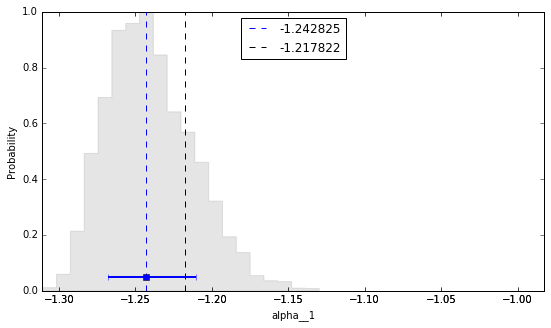

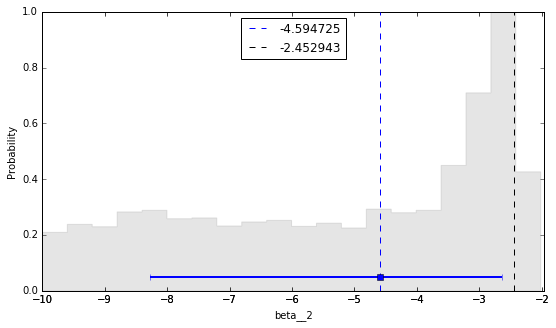

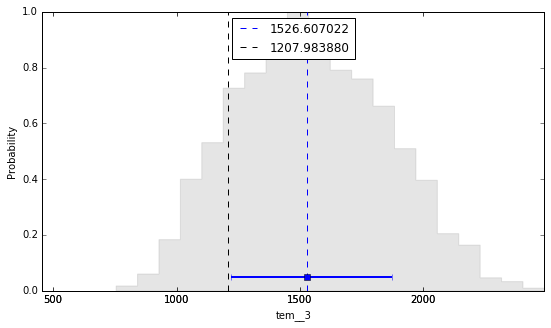

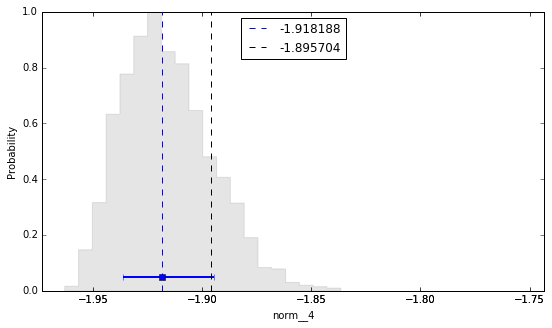

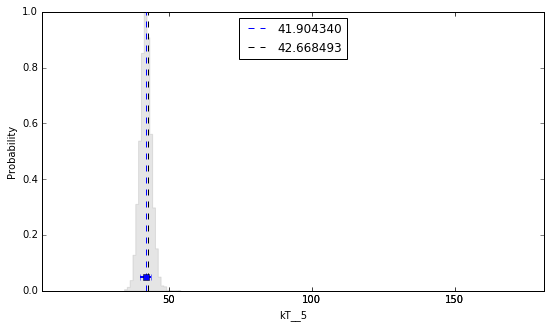

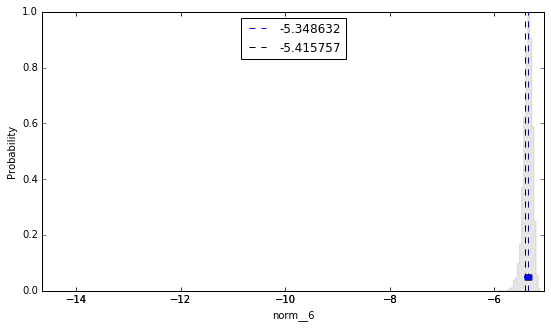

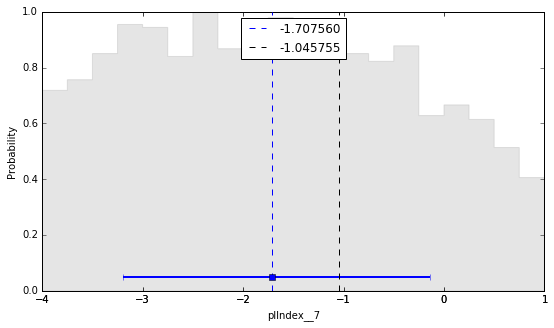

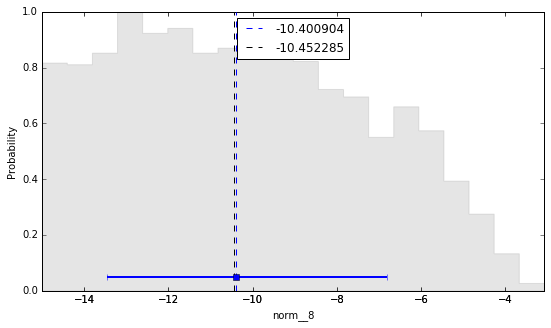

In [9]:
marginal_plots(stats_dict, Pars, nPars, values)

In [10]:
def marginal_plots_3sigma(stats, parameters, n_params, values):
    s = stats            # stats_dict, dictionary from stats.json file.
    n_params = n_params # nPars
    values = values    # array of the data from the chain.fits file. Parameter distributions. np.array(data2[:][:])
    modes = s['modes']

    #plt.figure(figsize=(5*n_params, 5*n_params))
    for i in range(n_params):
        plt.figure(figsize=(9,5))
        #plt.subplot(n_params, n_params, i + 1)
        plt.xlabel(parameters[i])

        m = s['marginals'][i]
        plt.xlim(m['3sigma'])

        oldax = plt.gca()
        
        if 'norm' in parameters[i]:
            x,w,patches = oldax.hist(numpy.log10(values[:,i]), bins=20, 
                                     edgecolor='grey', color='grey', 
                                     histtype='stepfilled', alpha=0.2)
        else:
            x,w,patches = oldax.hist(values[:,i], bins=20, 
                                     edgecolor='grey', color='grey', 
                                     histtype='stepfilled', alpha=0.2)
        oldax.set_ylim(0, x.max())

        newax = plt.gcf().add_axes(oldax.get_position(), sharex=oldax, frameon=False)
        #p.plot_marginal(i, ls='-', color='blue', linewidth=3)
        newax.set_ylim(0, 1)

        ylim = newax.get_ylim()
        y = ylim[0] + 0.05*(ylim[1] - ylim[0])
        center = m['median']
        low1, high1 = m['1sigma']
        #print center, low1, high1
        newax.errorbar(x=center, y=y,
            xerr=numpy.transpose([[center - low1, high1 - center]]), 
            color='blue', linewidth=2, marker='s')
        
        newax.vlines(center, 0, 1, linestyle='--', color='blue', lw=1, label="%f"%center)
        bestFit = s['modes'][0]['maximum'][i]
        newax.vlines(bestFit, 0, 1, linestyle='--', color='black', lw=1, label="%f"%bestFit)
        
        oldax.set_yticks([])
        #newax.set_yticks([])
        newax.set_ylabel("Probability")
        ylim = oldax.get_ylim()
        newax.set_xlim(m['3sigma'])
        oldax.set_xlim(m['3sigma'])
        #plt.legend(loc='best')
        plt.legend(loc=9)
        plt.show()

#plt.tight_layout() # kz keep axes from overlapping
#plt.savefig(prefix + 'marg.pdf')
#plt.savefig(prefix + 'marg.png')
#plt.close()

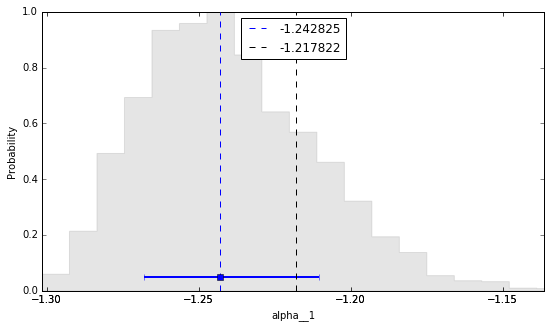

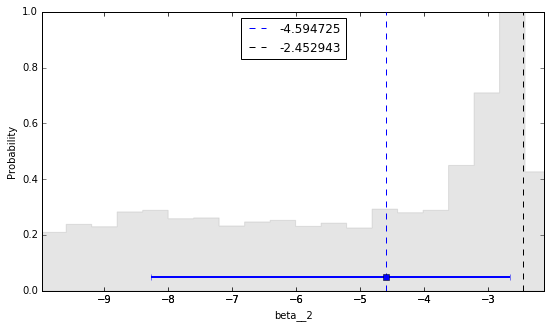

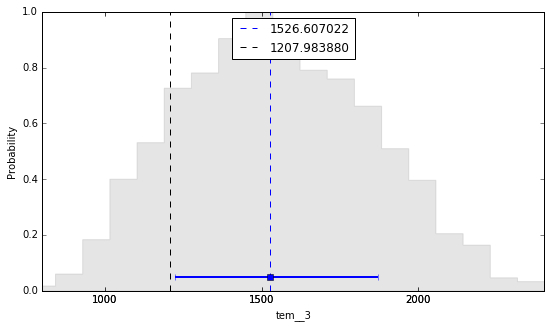

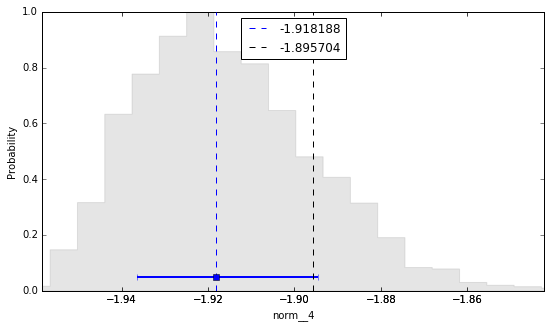

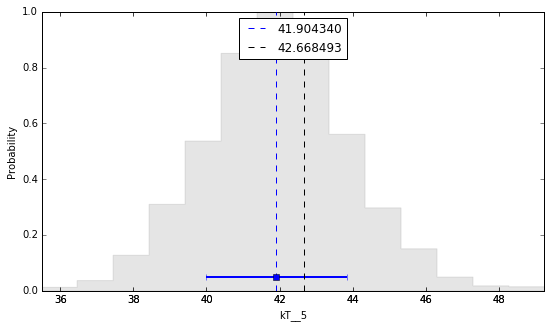

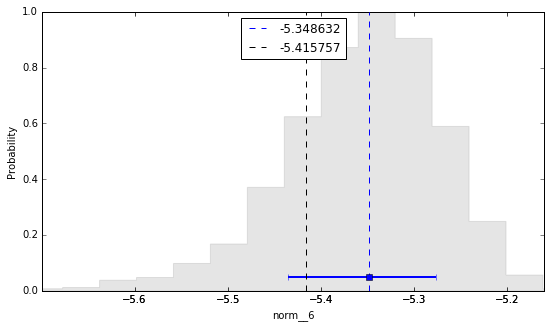

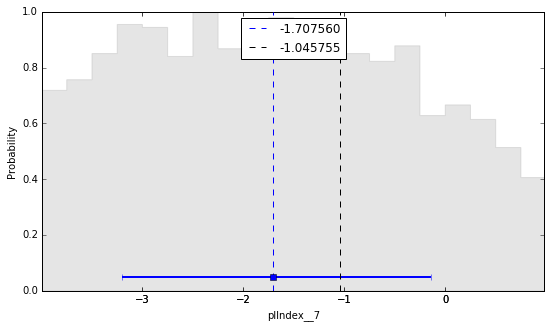

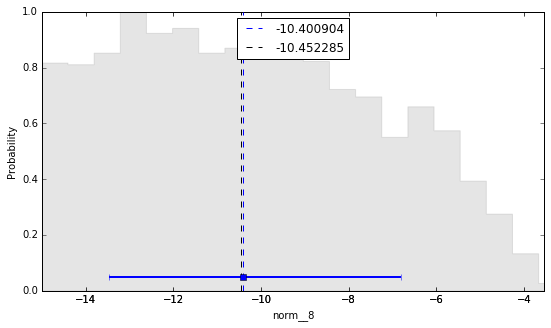

In [11]:
marginal_plots_3sigma(stats_dict, Pars, nPars, values)